<a href="https://colab.research.google.com/github/GeoNosX/911-Calls/blob/main/Sat_Image_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahmoudreda55/satellite-image-classification")

print("Path to dataset files:", path)

100%|██████████| 21.8M/21.8M [00:00<00:00, 129MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mahmoudreda55/satellite-image-classification/versions/1


In [3]:

labels = os.listdir(path+"/data")
labels

['green_area', 'desert', 'cloudy', 'water']

In [4]:
for label in labels:
    print(label, len(os.listdir(path+'/data/'+label)))

green_area 1500
desert 1131
cloudy 1500
water 1500


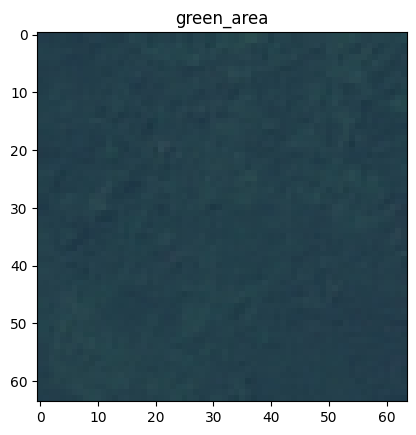

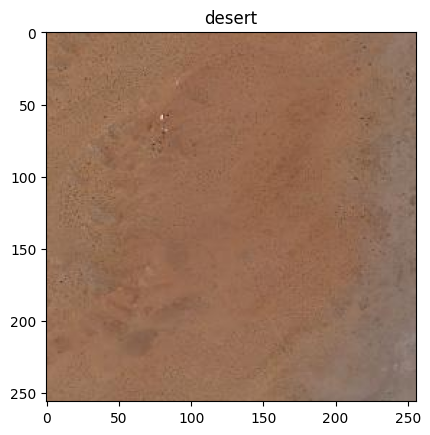

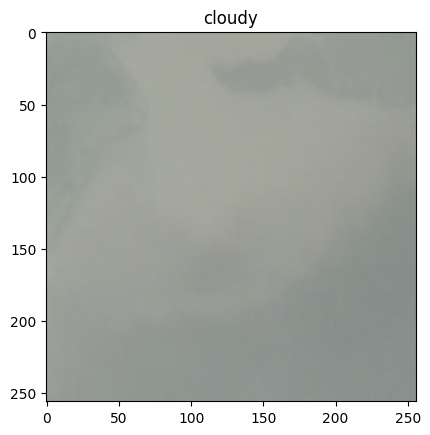

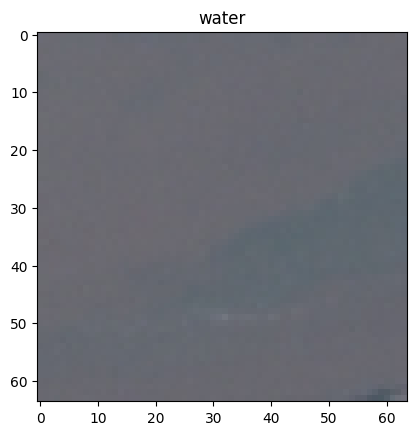

In [5]:
for label in labels:
  path_of=os.listdir(path+'/data/'+label)
  image=plt.imread(path+'/data/'+label+'/'+path_of[1])
  plt.title(label)
  plt.imshow(image)
  plt.show()

In [6]:
image_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [7]:
X_train=image_gen.flow_from_directory(path+'/data',target_size=(65,65),batch_size=32,class_mode='categorical',subset='training')

Found 4505 images belonging to 4 classes.


In [8]:
X_train.class_indices

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

In [9]:
X_train.image_shape

(65, 65, 3)

In [10]:
X_test=image_gen.flow_from_directory(path+'/data',target_size=(65,65),batch_size=32,class_mode='categorical',subset='validation')

Found 1126 images belonging to 4 classes.


In [11]:
from functools import partial

In [12]:
Convolution=partial(tf.keras.layers.Conv2D,)

In [25]:
Conv2D=partial(tf.keras.layers.Conv2D,kernel_size=3,activation='relu',padding='same',kernel_initializer='he_normal')

In [26]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(65,65,3)),
                           Conv2D(64),
                           tf.keras.layers.MaxPool2D(),
                           Conv2D(128),
                           tf.keras.layers.MaxPool2D(),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256,activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(64,activation='relu'),
                           tf.keras.layers.Dense(4,activation='softmax')

                      ])

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,epochs=20,validation_data=X_test)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.4649 - loss: 1.4030 - val_accuracy: 0.7700 - val_loss: 0.5291
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7121 - loss: 0.5876 - val_accuracy: 0.8215 - val_loss: 0.3978
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8177 - loss: 0.4337 - val_accuracy: 0.8615 - val_loss: 0.3471
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8439 - loss: 0.4105 - val_accuracy: 0.8091 - val_loss: 0.4761
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.8459 - loss: 0.3973 - val_accuracy: 0.8499 - val_loss: 0.3421
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8597 - loss: 0.3604 - val_accuracy: 0.8712 - val_loss: 0.3262
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8697 - loss: 0.3509 - val_accuracy: 0.8863 - val_loss: 0.2741
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.8858 - loss: 0.3063 - val_ac

In [28]:
history=model.history.history

<Axes: >

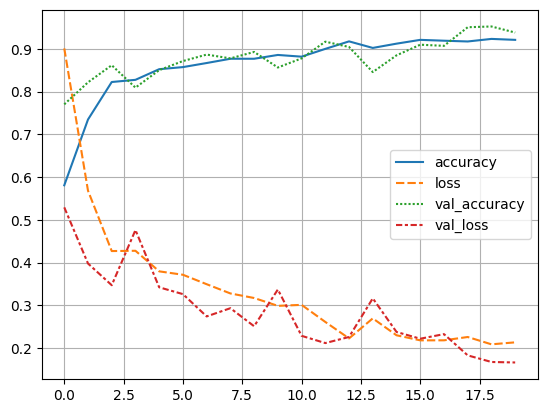

In [29]:
plt.grid(True)
sns.lineplot(data=history)

In [30]:
model_2=tf.keras.Sequential([tf.keras.layers.Input(shape=(65,65,3)),
                           Conv2D(64,kernel_size=4),
                           tf.keras.layers.AvgPool2D(pool_size=2),
                           Conv2D(128),
                           tf.keras.layers.AvgPool2D(pool_size=2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256,activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(64,activation='relu'),
                           tf.keras.layers.Dense(4,activation='softmax')

                      ])

In [31]:
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.fit(X_train,epochs=20,validation_data=X_test)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.5359 - loss: 1.2413 - val_accuracy: 0.8002 - val_loss: 0.4858
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7760 - loss: 0.4883 - val_accuracy: 0.8153 - val_loss: 0.4182
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.7711 - loss: 0.4916 - val_accuracy: 0.7913 - val_loss: 0.5196
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8152 - loss: 0.4611 - val_accuracy: 0.7886 - val_loss: 0.4328
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8417 - loss: 0.4089 - val_accuracy: 0.8304 - val_loss: 0.4494
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8479 - loss: 0.4130 - val_accuracy: 0.8552 - val_loss: 0.3437
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8502 - loss: 0.3883 - val_accuracy: 0.8464 - val_loss: 0.4153
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.8690 - loss: 0.3742 - val_ac

<Axes: >

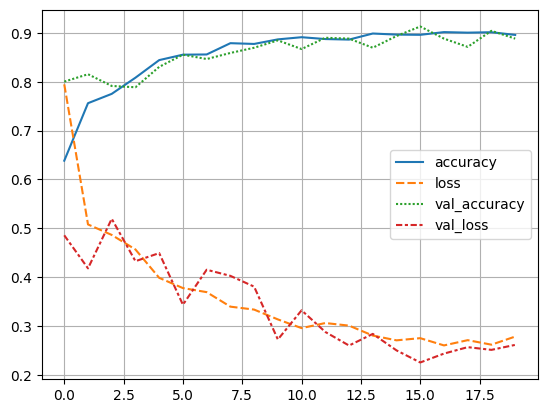

In [32]:
history_2=model_2.history.history
plt.grid(True)
sns.lineplot(data=history_2)